In [66]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn
import sklearn
import sklearn.ensemble
import sklearn.compose
from sklearn.preprocessing import *
from sklearn.feature_selection import VarianceThreshold


data = pd.read_csv("./Automobile_data.csv")
data

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.4,23.0,106,4800,26,27,22470


In [67]:
data.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [68]:
label_encoder = LabelEncoder()

data = data.replace("?", None)
data = data.fillna(value=np.nan)

data['make'] = label_encoder.fit_transform(data['make'])
data['fuel-type'] = label_encoder.fit_transform(data['fuel-type'])
data['aspiration'] = label_encoder.fit_transform(data['aspiration'])
data['num-of-doors'] = label_encoder.fit_transform(data['num-of-doors'])
data['body-style'] = label_encoder.fit_transform(data['body-style'])
data['drive-wheels'] = label_encoder.fit_transform(data['drive-wheels'])
data['engine-location'] = label_encoder.fit_transform(data['engine-location'])
data['engine-type'] = label_encoder.fit_transform(data['engine-type'])
data['num-of-cylinders'] = label_encoder.fit_transform(data['num-of-cylinders'])
data['fuel-system'] = label_encoder.fit_transform(data['fuel-system'])

data

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,0,1,0,1,0,2,0,88.6,...,130,5,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,0,1,0,1,0,2,0,88.6,...,130,5,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,0,1,0,1,2,2,0,94.5,...,152,5,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,1,1,0,0,3,1,0,99.8,...,109,5,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,1,1,0,0,3,0,0,99.4,...,136,5,3.19,3.4,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,21,1,0,0,3,2,0,109.1,...,141,5,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,21,1,1,0,3,2,0,109.1,...,141,5,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,21,1,0,0,3,2,0,109.1,...,173,5,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,21,0,1,0,3,2,0,109.1,...,145,3,3.01,3.4,23.0,106,4800,26,27,22470


<ipython-input-69-4131079f344d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  seaborn.heatmap(data.corr())


<AxesSubplot:>

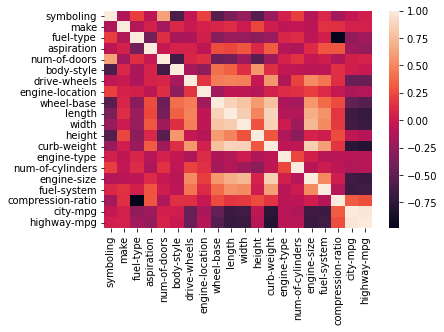

In [69]:
seaborn.heatmap(data.corr())

In [70]:
data.isnull().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          0
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [71]:
def replaceWithZero(column_name):
    data[column_name] = data[column_name].fillna(value=0, inplace=True)

data["normalized-losses"].fillna(value=0, inplace=True)
data["bore"].fillna(value=0, inplace=True)
data["stroke"].fillna(value=0, inplace=True)
data["horsepower"].fillna(value=0, inplace=True)
data["peak-rpm"].fillna(value=0, inplace=True)
data["price"].fillna(value=1, inplace=True)
data['price'] = data['price'].apply(lambda x: float(x))

display(data.dtypes)
data

symboling              int64
normalized-losses     object
make                   int32
fuel-type              int32
aspiration             int32
num-of-doors           int32
body-style             int32
drive-wheels           int32
engine-location        int32
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type            int32
num-of-cylinders       int32
engine-size            int64
fuel-system            int32
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,0,0,1,0,1,0,2,0,88.6,...,130,5,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,0,0,1,0,1,0,2,0,88.6,...,130,5,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,0,0,1,0,1,2,2,0,94.5,...,152,5,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,164,1,1,0,0,3,1,0,99.8,...,109,5,3.19,3.4,10.0,102,5500,24,30,13950.0
4,2,164,1,1,0,0,3,0,0,99.4,...,136,5,3.19,3.4,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,21,1,0,0,3,2,0,109.1,...,141,5,3.78,3.15,9.5,114,5400,23,28,16845.0
201,-1,95,21,1,1,0,3,2,0,109.1,...,141,5,3.78,3.15,8.7,160,5300,19,25,19045.0
202,-1,95,21,1,0,0,3,2,0,109.1,...,173,5,3.58,2.87,8.8,134,5500,18,23,21485.0
203,-1,95,21,0,1,0,3,2,0,109.1,...,145,3,3.01,3.4,23.0,106,4800,26,27,22470.0


In [72]:
cleaned_data = data[data.price < data.price.quantile(0.9)]
cleaned_data

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,0,0,1,0,1,0,2,0,88.6,...,130,5,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,0,0,1,0,1,0,2,0,88.6,...,130,5,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,0,0,1,0,1,2,2,0,94.5,...,152,5,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,164,1,1,0,0,3,1,0,99.8,...,109,5,3.19,3.4,10.0,102,5500,24,30,13950.0
4,2,164,1,1,0,0,3,0,0,99.4,...,136,5,3.19,3.4,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,-2,103,21,1,1,0,3,2,0,104.3,...,130,5,3.62,3.15,7.5,162,5100,17,22,18420.0
199,-1,74,21,1,1,0,4,2,0,104.3,...,130,5,3.62,3.15,7.5,162,5100,17,22,18950.0
200,-1,95,21,1,0,0,3,2,0,109.1,...,141,5,3.78,3.15,9.5,114,5400,23,28,16845.0
201,-1,95,21,1,1,0,3,2,0,109.1,...,141,5,3.78,3.15,8.7,160,5300,19,25,19045.0


In [73]:
columns_array = data.columns

selection = VarianceThreshold(threshold=(0.5))
selected_data = selection.fit_transform(cleaned_data.drop(["price"], axis=1), cleaned_data["price"])
selected_features = selection.get_feature_names_out(columns_array[:len(columns_array) - 1])
selected_data = pd.DataFrame(selected_data, columns=selected_features)

deleted_features = np.array([], dtype=str)

for feature in columns_array[:len(columns_array) - 1]:
    if feature not in selected_features:
        deleted_features = np.append(deleted_features, feature)

display(pd.DataFrame(selected_features))
display(pd.DataFrame(deleted_features))
display(selected_data)

,0
0,symboling
1,normalized-losses
2,make
3,body-style
4,wheel-base
5,length
6,width
7,height
8,curb-weight
9,engine-type


,0
0,fuel-type
1,aspiration
2,num-of-doors
3,drive-wheels
4,engine-location
5,num-of-cylinders
6,bore
7,stroke


,symboling,normalized-losses,make,body-style,wheel-base,length,width,height,curb-weight,engine-type,engine-size,fuel-system,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg
0,3,0,0,0,88.6,168.8,64.1,48.8,2548,0,130,5,9.0,111,5000,21,27
1,3,0,0,0,88.6,168.8,64.1,48.8,2548,0,130,5,9.0,111,5000,21,27
2,1,0,0,2,94.5,171.2,65.5,52.4,2823,5,152,5,9.0,154,5000,19,26
3,2,164,1,3,99.8,176.6,66.2,54.3,2337,3,109,5,10.0,102,5500,24,30
4,2,164,1,3,99.4,176.6,66.4,54.3,2824,3,136,5,8.0,115,5500,18,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,-2,103,21,3,104.3,188.8,67.2,56.2,3045,3,130,5,7.5,162,5100,17,22
180,-1,74,21,4,104.3,188.8,67.2,57.5,3157,3,130,5,7.5,162,5100,17,22
181,-1,95,21,3,109.1,188.8,68.9,55.5,2952,3,141,5,9.5,114,5400,23,28
182,-1,95,21,3,109.1,188.8,68.8,55.5,3049,3,141,5,8.7,160,5300,19,25


In [74]:
tree_classifier = sklearn.ensemble.RandomForestRegressor(n_estimators=50)
tree_classifier.fit(cleaned_data.drop(["price"], axis=1), cleaned_data["price"])
model = sklearn.feature_selection.SelectFromModel(tree_classifier, prefit=True)
forest_selected_data = model.transform(cleaned_data.drop(["price"], axis=1))
forest_selected_data

c:\Users\1\AppData\Local\Programs\Python\Python38-32\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


array([[0, 88.6, 2548, '111', 27],
       [0, 88.6, 2548, '111', 27],
       [0, 94.5, 2823, '154', 26],
       ['164', 99.8, 2337, '102', 30],
       ['164', 99.4, 2824, '115', 22],
       [0, 99.8, 2507, '110', 25],
       ['158', 105.8, 2844, '110', 25],
       [0, 105.8, 2954, '110', 25],
       [0, 99.5, 3053, '160', 22],
       ['192', 101.2, 2395, '101', 29],
       ['192', 101.2, 2395, '101', 29],
       ['188', 101.2, 2710, '121', 28],
       ['188', 101.2, 2765, '121', 28],
       ['121', 88.4, 1488, '48', 53],
       ['98', 94.5, 1874, '70', 43],
       ['81', 94.5, 1909, '70', 43],
       ['118', 93.7, 1876, '68', 41],
       ['118', 93.7, 1876, '68', 38],
       ['118', 93.7, 2128, '102', 30],
       ['148', 93.7, 1967, '68', 38],
       ['148', 93.7, 1989, '68', 38],
       ['148', 93.7, 1989, '68', 38],
       ['148', 93.7, 2191, '102', 30],
       ['110', 103.3, 2535, '88', 30],
       ['145', 95.9, 2811, '145', 24],
       ['137', 86.6, 1713, '58', 54],
       ['137', 

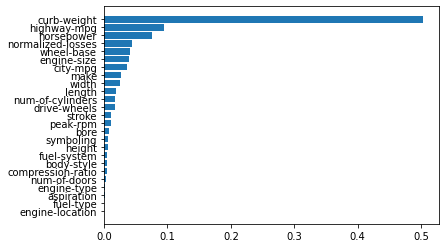

In [75]:
feature_importances = tree_classifier.feature_importances_
indices = np.argsort(feature_importances)
plt.yticks(range(len(indices)), np.array(cleaned_data.drop(["price"], axis=1).columns)[indices])
plt.barh(range(len(indices)), feature_importances[indices])
plt.show()